In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def deterministic_model_onstage(t, u0, s0, alfa, beta, gamma):
  #analytical solution of the deterministic model in the on stage
  u =  u0*np.exp(-beta*t) + (alfa/beta) * (1-np.exp(-beta*t))
  s =  s0*np.exp(-gamma*t) + (alfa/gamma) * (1-np.exp(-gamma*t)) + ((alfa-beta*u0)/(gamma-beta))*(np.exp(-gamma*t)-np.exp(-beta*t))
  return u, s

In [ ]:
def deterministic_model_offstage(t, t_switch, u_switch, s_switch, beta, gamma):
  u =  u_switch*np.exp(-beta*(t-t_switch))
  s =  s_switch*np.exp(-gamma*(t-t_switch)) - ((beta * u_switch/(gamma-beta))) * (np.exp(-gamma*(t-t_switch))-np.exp(-beta*(t-t_switch)))
  return u, s

In [ ]:
def stochastic_model_onstage(t, alfa, beta, gamma):
  a = (alfa/beta) * (1-np.exp(-beta*t))
  b = (alfa/gamma)*(1-np.exp(-gamma*t))+(alfa/(gamma-beta))*(np.exp(-gamma*t)-np.exp(-beta*t))

  P_u = np.random.poisson(a)
  P_s = np.random.poisson(b)
  return P_u, P_s

In [ ]:
def stochastic_model_offstage(t, t_switch, u_switch, s_switch, beta, gamma):
  #analytical solution of the stochastic model in the on stage

  p1 = np.exp(-beta*(t-t_switch))
  p2 = (beta/(beta-gamma))*((np.exp(-gamma*(t-t_switch))-np.exp(-beta*(t-t_switch)))/(1-np.exp(-beta*(t-t_switch)))) #correct if beta != gamma
  p3 = np.exp(-gamma*(t-t_switch))
  
  B_u = np.random.binomial(np.round(u_switch).astype(int), p1)
  B_k = np.random.binomial(np.round(u_switch*(1-p1)).astype(int), p2)
  B_n_k = np.random.binomial(np.round(s_switch).astype(int), p3)
  B_s = B_k + B_n_k

  return B_u, B_s

In [ ]:
def simulation(u0, s0, alfa, beta, gamma, t_final, n_simulated_data, relative_t_switch):

  step = t_final / n_simulated_data
  t_switch_index = np.round(relative_t_switch * n_simulated_data).astype(int)
  #t_switch_index = relative_t_switch * n_simulated_data

  t_switch = np.round(step * t_switch_index).astype(int)
  
  t_range_on = np.linspace(0.01, t_switch, n_simulated_data)
  t_range_off = np.linspace(t_switch+0.001, t_final, n_simulated_data)
  u_det_on, s_det_on = deterministic_model_onstage(t_range_on, u0, s0, alfa, beta, gamma)
  u_stoch_on, s_stoch_on = stochastic_model_onstage(t_range_on, alfa, beta, gamma)
  u_switch = u_det_on[-1]
  s_switch = s_det_on[-1]
  u_det_off, s_det_off = deterministic_model_offstage(t_range_off, t_switch, u_switch, s_switch, beta, gamma)
  u_stoch_off, s_stoch_off = stochastic_model_offstage(t_range_off, t_switch, u_switch, s_switch, beta, gamma)

  t = np.concatenate((t_range_on, t_range_off))
  u_det = np.concatenate((u_det_on, u_det_off))
  s_det = np.concatenate((s_det_on, s_det_off))
  u_stoch = np.concatenate((u_stoch_on, u_stoch_off))
  s_stoch = np.concatenate((s_stoch_on, s_stoch_off))

  print(u_det.shape)
  print(s_det.shape)

  return t, t_switch, t_switch_index, u_det, s_det, u_stoch, s_stoch

In [ ]:
def plot_simulation(t, t_switch, u_det, s_det, u_stoch, s_stoch):
  plt.figure(figsize=(12,6))
  plt.plot(t, u_det, label='unspliced deterministic')
  plt.plot(t, s_det, label='spliced deterministic')
  plt.scatter(t, u_stoch, s=5, label='unspliced stochastic')
  plt.scatter(t, s_stoch, s=5, label='spliced stochastic')
  plt.axvline(x = t_switch, color='green', linestyle='--', label = 'switch time')
  plt.legend()
  plt.grid(True)
  plt.title("Analytical solutions to deterministic and stochastic model")


In [ ]:
def plot_phase_plane(t, t_switch, n_simulated_data, u_det, s_det, u_stoch, s_stoch):
  plt.figure(figsize=(12,6))
  u_det_on = u_det[:n_simulated_data]
  s_det_on = s_det[:n_simulated_data]
  u_det_off = u_det[n_simulated_data:]
  s_det_off = s_det[n_simulated_data:]
  u_stoch_on = u_stoch[:n_simulated_data]
  s_stoch_on = s_stoch[:n_simulated_data]
  u_stoch_off = u_stoch[n_simulated_data:]
  s_stoch_off = s_stoch[n_simulated_data:]


  plt.plot(u_det_on, s_det_on, label='on stage deterministic')
  plt.plot(u_det_off, s_det_off, label='off stage deterministic')
  plt.scatter(u_stoch_on, s_stoch_on, s=5, label='on stage stochastic')
  plt.scatter(u_stoch_off, s_stoch_off, s=5, label='off stage stochastic')
  plt.scatter(u_det_on[-1], s_det_on[-1], s=80, label='switch')
  plt.text(u_det_on[-1]+0.5, s_det_on[-1]-0.1, f't_switch:{t_switch}')

  plt.legend()
  plt.grid(True)
  plt.title("Phase plane")

  


In [ ]:
def main(
  u0 = 0,
  s0 = 0,
  alfa = 20,
  beta = 1,
  gamma = 0.75,
  t_final = 15,
  n_simulated_data = 200,
  relative_t_switch = 0.5): #from 0 to 1

  t, t_switch, t_switch_index, u_det, s_det, u_stoch, s_stoch = simulation(u0, s0, alfa, beta, gamma, t_final, n_simulated_data, relative_t_switch)
  plot_simulation(t, t_switch, u_det, s_det, u_stoch, s_stoch)
  plot_phase_plane(t, t_switch, n_simulated_data, u_det, s_det, u_stoch, s_stoch)
  

(400,)
(400,)


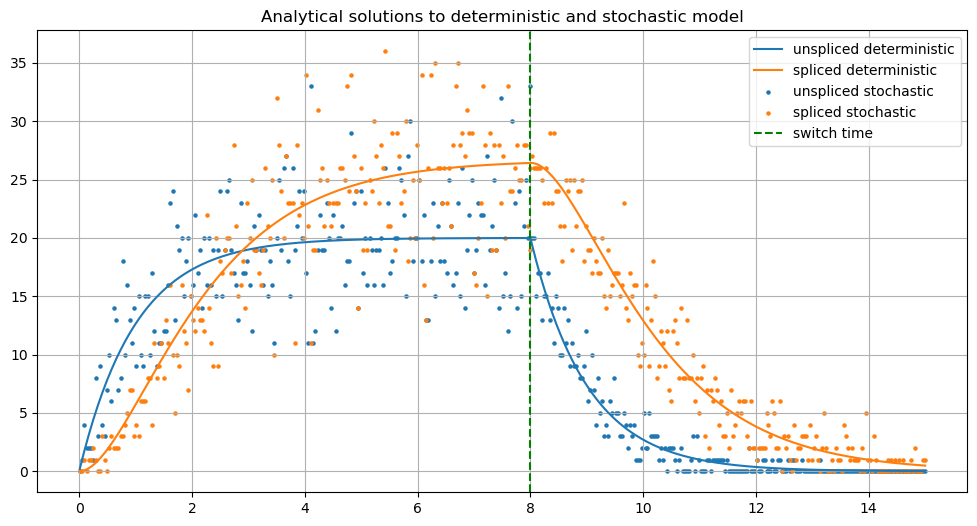

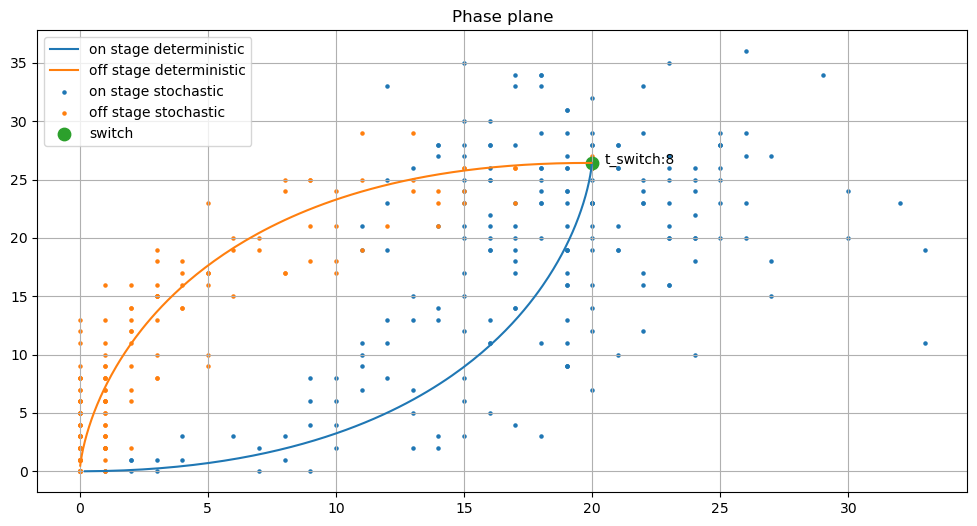

In [ ]:
main()